# Desempeño en Cursos Introductorios de Matemática: Modelos Predictivos
---

In [1]:
# Importar librerias
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn

sns.set_style("darkgrid")

In [2]:
# Definir ubicación de archivos
# En Linux/Mac:
# path = r"~/Desktop/Mate_PI/files/"
# En Windows:
path = r"~\OneDrive\Escritorio\Mate_PI\files\\"

mate_pi = pd.read_csv(path + "Mate_PI_full_clean.csv", index_col=0, dtype={"Condicion":"category", "Tipo_Cursada":"category"})

In [3]:
mate_pi.columns

Index(['1P1F', '1P2F', '2P1F', '2P2F', 'F1', 'F2', 'Condicion', 'Final', 'Año',
       'Tipo_Cursada', 'Virtual', 'Oral', 'Grupo'],
      dtype='object')

In [4]:
# Limpieza de columnas:
# 1- No me interesan datos sobre Virtual, Grupo
filtered = mate_pi.drop(columns=["Virtual", "Grupo"])

# 2- Voy a excluir aquellos que hayan Desaprobado en el Oral
filtered = filtered[ filtered["Oral"] != "Desaprobado" ]

# 3- No me interesa la columna Oral
filtered = filtered.drop(columns=["Oral"])

In [5]:
filtered["Tipo_Cursada"].unique()

['Verano', 'Anticipada', '1er Semestre']
Categories (3, object): ['1er Semestre', 'Anticipada', 'Verano']

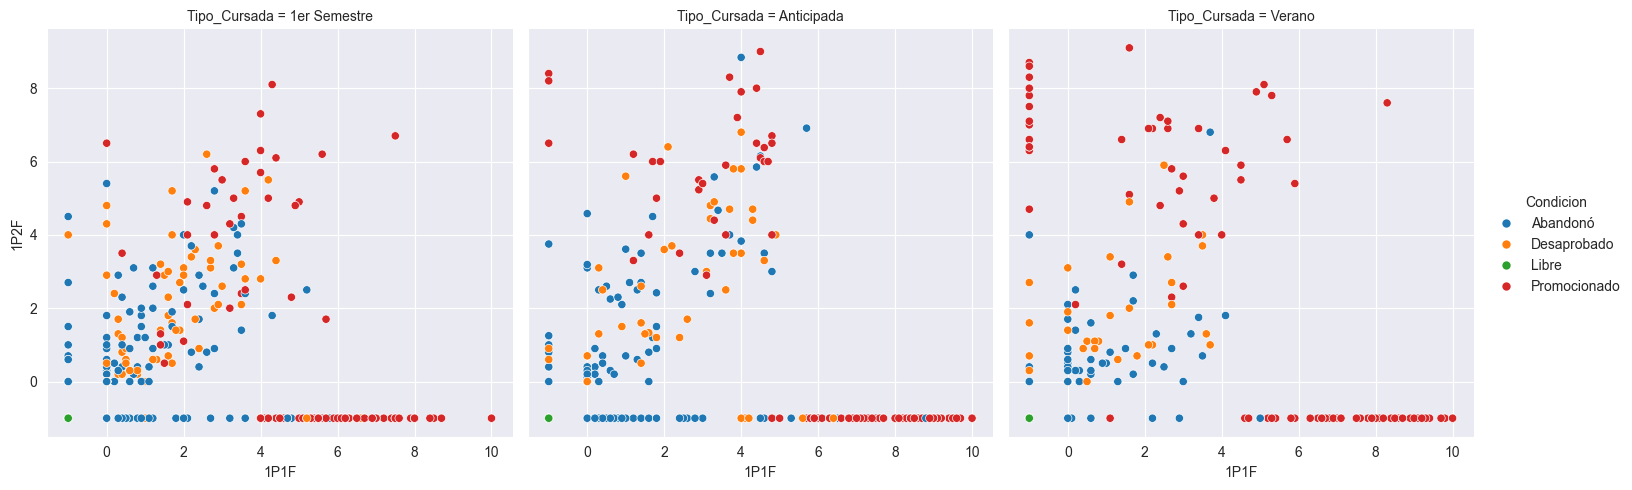

In [6]:
# Inspección de algunas relaciones
sns.relplot(
    data=filtered,
    x="1P1F",
    y="1P2F",
    hue="Condicion",
    col="Tipo_Cursada"
)
plt.show()

In [7]:
# Cantidad de alumnos según Condicion en Verano 2020
mate_pi[ (mate_pi["Tipo_Cursada"]=="Verano") & (mate_pi["Año"]==2020)]["Condicion"].value_counts()

Condicion
Promocionado    44
Abandonó        28
Libre           22
Desaprobado     14
Name: count, dtype: int64

In [8]:
# Proporción de datos mal cargados: Desaprobados Verano 2020 respecto al total de datos de Verano
mate_pi[ mate_pi["Tipo_Cursada"]=="Verano"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 316 entries, 0 to 946
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   1P1F          316 non-null    float64 
 1   1P2F          316 non-null    float64 
 2   2P1F          316 non-null    float64 
 3   2P2F          316 non-null    float64 
 4   F1            316 non-null    float64 
 5   F2            316 non-null    float64 
 6   Condicion     316 non-null    category
 7   Final         316 non-null    int64   
 8   Año           316 non-null    int64   
 9   Tipo_Cursada  316 non-null    category
 10  Virtual       316 non-null    int64   
 11  Oral          0 non-null      object  
 12  Grupo         0 non-null      object  
dtypes: category(2), float64(6), int64(3), object(2)
memory usage: 30.6+ KB


In [9]:
14/316

0.04430379746835443

In [10]:
# Corresponde a un 4,4% del total de alumnos del Verano. Voy a implementar data imputation tomandolos como Null values
Verano = filtered[ filtered["Tipo_Cursada"]=="Verano"].copy()
# Reemplazo con NaN los valores desconocidos de Verano 2020
Verano.loc[(Verano["Año"]==2020) & (Verano["Condicion"]=="Desaprobado"), ["1P1F", "1P2F", "2P1F", "2P2F"]] =\
                                Verano.loc[(Verano["Año"]==2020) & (Verano["Condicion"]=="Desaprobado"), ["1P1F", "1P2F", "2P1F", "2P2F"]].replace(0, np.nan)

In [11]:
Verano

,1P1F,1P2F,2P1F,2P2F,F1,F2,Condicion,Final,Año,Tipo_Cursada
0,NaN,NaN,NaN,NaN,-1.0,-1.0,Desaprobado,0,2020,Verano
1,-1.0,7.0,8.2,-1.0,-1.0,-1.0,Promocionado,8,2020,Verano
2,NaN,NaN,NaN,NaN,-1.0,-1.0,Desaprobado,0,2020,Verano
3,NaN,NaN,NaN,NaN,-1.0,-1.0,Desaprobado,0,2020,Verano
4,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,Libre,0,2020,Verano
...,...,...,...,...,...,...,...,...,...,...
942,0.6,0.3,-1.0,-1.0,-1.0,-1.0,Abandonó,0,2024,Verano
943,10.0,-1.0,10.0,-1.0,-1.0,-1.0,Promocionado,10,2024,Verano
944,2.5,5.9,0.5,3.4,-1.0,2.2,Desaprobado,0,2024,Verano
945,1.8,0.7,0.9,4.0,3.2,-1.0,Desaprobado,0,2024,Verano


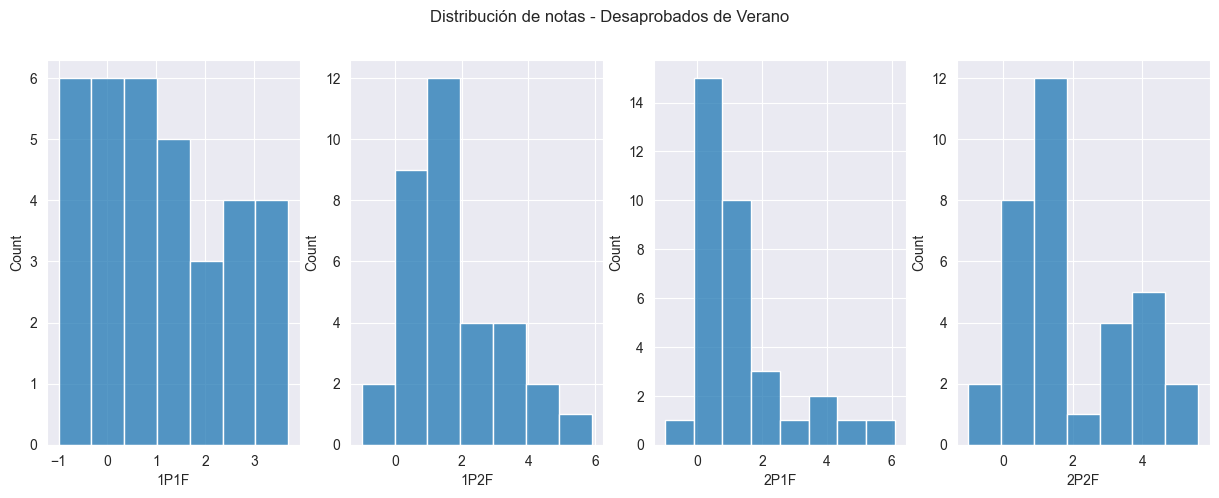

In [12]:
# Distribuciones de notas de Desaprobados en Verano
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(15,5))
parciales = ["1P1F", "1P2F", "2P1F", "2P2F"]
for parcial, i in zip(parciales, range(4)):
    data_temp = Verano[Verano["Condicion"]=="Desaprobado"][parcial]
    sns.histplot(
        data=data_temp,
        ax=ax[i]
    )
plt.suptitle("Distribución de notas - Desaprobados de Verano")
plt.show()

In [13]:
Verano[Verano["Condicion"]=="Desaprobado"].describe()

,1P1F,1P2F,2P1F,2P2F,F1,F2,Final,Año
count,34.000000,34.000000,34.000000,34.000000,48.000000,48.000000,48.0,48.000000
mean,1.035294,1.664706,1.202941,1.838235,-0.031250,-0.897917,0.0,2022.291667
std,1.480148,1.532651,1.575472,1.781047,2.155562,0.518381,0.0,1.700542
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.0,2020.000000
25%,0.000000,0.900000,0.025000,0.725000,-1.000000,-1.000000,0.0,2020.000000
50%,0.750000,1.200000,0.900000,1.350000,-1.000000,-1.000000,0.0,2022.000000
75%,2.175000,2.550000,1.575000,3.400000,-1.000000,-1.000000,0.0,2024.000000
max,3.700000,5.900000,6.100000,5.600000,6.300000,2.200000,0.0,2024.000000


In [14]:
# Las notas de Desaprobados de cada parcial siguen distribuciones asimétricas a derecha, excepto 1P1F. 

# Para 1P1F: supongo distribución uniforme, voy a asignar valores aleatorios entre el máximo y el mínimo
max_1 = Verano[Verano["Condicion"]=="Desaprobado"]["1P1F"].max()
min_1 = 0
# Calculo cantidad de nulos en la columna
nulos_1 = Verano[Verano["Condicion"]=="Desaprobado"]["1P1F"].isna().sum()
# Gereno una lista de números aleatorios para reemplazar en NaN:
np.random.seed(2222)
new_values = np.random.uniform(low=min_1, high=max_1, size=nulos_1).round(2)
# Reemplazo con los nuevos valores
Verano.loc[(Verano["Condicion"]=="Desaprobado")&(Verano["1P1F"].isna()), ["1P1F"]] = new_values

# Para los otros parciales, utilizo imputación por mediana:
parciales = ["1P2F", "2P1F", "2P2F"]
for parcial in parciales:
    desaprobados = Verano[Verano["Condicion"]=="Desaprobado"][parcial]
    median = desaprobados.median()
    Verano.loc[(Verano["Condicion"]=="Desaprobado"), [parcial]] = Verano.loc[(Verano["Condicion"]=="Desaprobado"), [parcial]].fillna(median)
Verano

,1P1F,1P2F,2P1F,2P2F,F1,F2,Condicion,Final,Año,Tipo_Cursada
0,2.69,1.2,0.9,1.35,-1.0,-1.0,Desaprobado,0,2020,Verano
1,-1.00,7.0,8.2,-1.00,-1.0,-1.0,Promocionado,8,2020,Verano
2,1.07,1.2,0.9,1.35,-1.0,-1.0,Desaprobado,0,2020,Verano
3,3.14,1.2,0.9,1.35,-1.0,-1.0,Desaprobado,0,2020,Verano
4,-1.00,-1.0,-1.0,-1.00,-1.0,-1.0,Libre,0,2020,Verano
...,...,...,...,...,...,...,...,...,...,...
942,0.60,0.3,-1.0,-1.00,-1.0,-1.0,Abandonó,0,2024,Verano
943,10.00,-1.0,10.0,-1.00,-1.0,-1.0,Promocionado,10,2024,Verano
944,2.50,5.9,0.5,3.40,-1.0,2.2,Desaprobado,0,2024,Verano
945,1.80,0.7,0.9,4.00,3.2,-1.0,Desaprobado,0,2024,Verano


In [15]:
# Inserto modificaciones en el DataFrame completo
filtered.loc[(filtered["Tipo_Cursada"]=="Verano")] = Verano

In [16]:
# Elimino la columna de Año
filtered = filtered.drop(columns=["Año"])

In [17]:
filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1203 entries, 0 to 1222
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   1P1F          1203 non-null   float64 
 1   1P2F          1203 non-null   float64 
 2   2P1F          1203 non-null   float64 
 3   2P2F          1203 non-null   float64 
 4   F1            1203 non-null   float64 
 5   F2            1203 non-null   float64 
 6   Condicion     1203 non-null   category
 7   Final         1203 non-null   int64   
 8   Tipo_Cursada  1203 non-null   category
dtypes: category(2), float64(6), int64(1)
memory usage: 77.9 KB


## Preparación del dataset

### Columnas Categóricas: `Tipo_Cursada`

In [18]:
# Creo dummy values para los Tipos de Cursada
new_columns = pd.get_dummies(filtered["Tipo_Cursada"], drop_first=False, dtype="int")
# Agrego las nuevas columnas y quito la columna categórica original
filtered = pd.concat([filtered, new_columns], axis=1)
filtered = filtered.drop(columns=["Tipo_Cursada"])
filtered

,1P1F,1P2F,2P1F,2P2F,F1,F2,Condicion,Final,1er Semestre,Anticipada,Verano
0,2.69,1.2,0.9,1.35,-1.0,-1.0,Desaprobado,0,0,0,1
1,-1.00,7.0,8.2,-1.00,-1.0,-1.0,Promocionado,8,0,0,1
2,1.07,1.2,0.9,1.35,-1.0,-1.0,Desaprobado,0,0,0,1
3,3.14,1.2,0.9,1.35,-1.0,-1.0,Desaprobado,0,0,0,1
4,-1.00,-1.0,-1.0,-1.00,-1.0,-1.0,Libre,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1218,4.50,-1.0,3.6,7.60,-1.0,-1.0,Promocionado,6,1,0,0
1219,2.80,4.0,3.2,6.50,5.5,-1.0,Promocionado,6,1,0,0
1220,1.00,1.2,-1.0,-1.00,-1.0,-1.0,Abandonó,0,1,0,0
1221,1.20,0.9,0.0,-1.00,-1.0,-1.0,Abandonó,0,1,0,0


### Target Feature: `Condicion`

In [19]:
# En principio voy a probar Clasificadores Binarios. Voy a distinguir únicamente entre Promocionados y No Promocionados
filtered["Condicion"] = filtered["Condicion"].astype("str")
filtered["Condicion"] = filtered["Condicion"].replace(to_replace="Promocionado", value=1)
filtered.loc[(filtered["Condicion"]!=1), ["Condicion"]] = 0
filtered["Condicion"] = filtered["Condicion"].astype("int")

In [20]:
# Reviso distribución de valores
filtered.describe()

,1P1F,1P2F,2P1F,2P2F,F1,F2,Condicion,Final,1er Semestre,Anticipada,Verano
count,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000
mean,1.899144,0.426359,1.442976,0.246658,-0.530008,-0.602062,0.287614,2.086451,0.397340,0.339983,0.262677
std,3.232509,2.285236,3.320641,2.476724,1.854079,1.649417,0.452839,3.343483,0.489551,0.473900,0.440271
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,1.000000,3.750000,0.000000,-1.000000,-1.000000,1.000000,6.000000,1.000000,1.000000,1.000000
max,10.000000,9.100000,10.000000,9.800000,10.000000,8.900000,1.000000,10.000000,1.000000,1.000000,1.000000


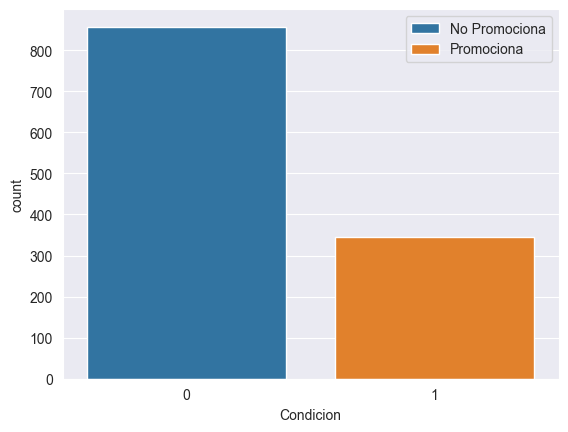

In [21]:
# El target feature está desbalanceado en el dataset: el 28,7% de datos corresponde a Promocionados, el 71.3% restante corresponde a No Promocionados
sns.countplot(data=filtered, x="Condicion", hue="Condicion")
plt.legend(["No Promociona", "Promociona"])
plt.show()

In [22]:
filtered

,1P1F,1P2F,2P1F,2P2F,F1,F2,Condicion,Final,1er Semestre,Anticipada,Verano
0,2.69,1.2,0.9,1.35,-1.0,-1.0,0,0,0,0,1
1,-1.00,7.0,8.2,-1.00,-1.0,-1.0,1,8,0,0,1
2,1.07,1.2,0.9,1.35,-1.0,-1.0,0,0,0,0,1
3,3.14,1.2,0.9,1.35,-1.0,-1.0,0,0,0,0,1
4,-1.00,-1.0,-1.0,-1.00,-1.0,-1.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1218,4.50,-1.0,3.6,7.60,-1.0,-1.0,1,6,1,0,0
1219,2.80,4.0,3.2,6.50,5.5,-1.0,1,6,1,0,0
1220,1.00,1.2,-1.0,-1.00,-1.0,-1.0,0,0,1,0,0
1221,1.20,0.9,0.0,-1.00,-1.0,-1.0,0,0,1,0,0
